In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


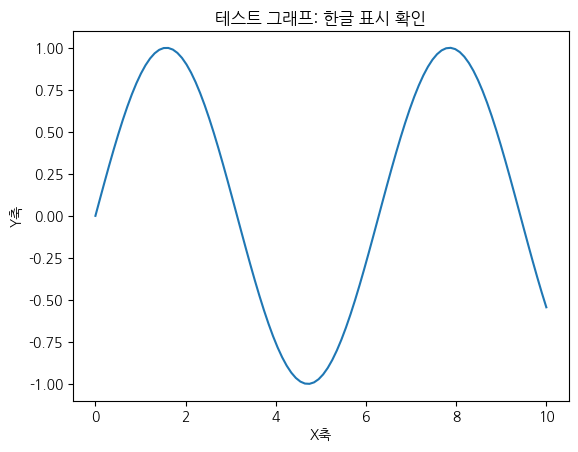

In [ ]:
# 1. 나눔 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 2. 설치된 폰트 확인 및 matplotlib에 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import os

# 폰트 캐시 제거
font_cache_path = os.path.join(matplotlib.get_cachedir(), 'fontlist-v330.json')
if os.path.exists(font_cache_path):
    os.remove(font_cache_path)
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    plt.rc('font', family=fm.FontProperties(fname=font_path).get_name())
else:
    print("나눔 폰트가 설치되지 않았습니다.")

# 3. 테스트 그래프
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("테스트 그래프: 한글 표시 확인")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()


# 2023년 임업경영실태조사
>- 인포그래픽을 엑셀로 정리
>- 엑셀을 분석함

산림청 인포그래픽 필수데이터 임업경영실태조사 2023
 https://kfss.forest.go.kr/stat/ptl/infoGraphc/infoGraphcDtl.do


# 임업경영실태조사 관심도 분석

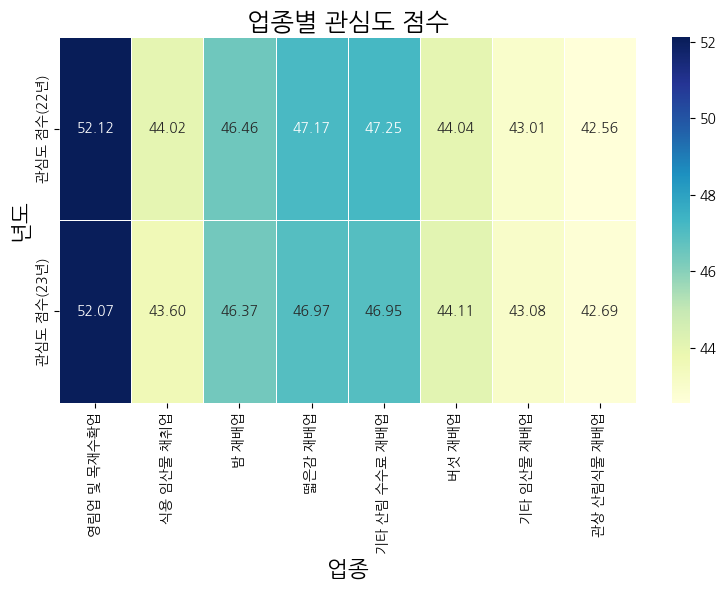

In [ ]:
# 데이터 로드
file_path = '/content/drive/MyDrive/data/2023_Forest_Management_Survey.xlsx'
df = pd.read_excel(file_path)

# 관심도 점수 계산
df['관심도 점수(22년)'] = (
    (df['22년 판매수입(백만원)'] / df['22년 투입비용(백만원)']) * 0.25 +
    df['소득 동향 비율 (%)'] * 0.25 +
    df['생산량 동향 비율 (%)'] * 0.25 +
    df['업종전망 비율 (%)'] * 0.25
)

df['관심도 점수(23년)'] = (
    (df['23년 판매수입(백만원)'] / df['23년 투입비용(백만원)']) * 0.25 +
    df['소득 동향 비율 (%)'] * 0.25 +
    df['생산량 동향 비율 (%)'] * 0.25 +
    df['업종전망 비율 (%)'] * 0.25
)
plt.figure(figsize=(8, 6))

# 히트맵 데이터 준비
heatmap_data = df[['Category', '관심도 점수(22년)', '관심도 점수(23년)']].set_index('Category').T

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# 제목 및 축 라벨 설정
plt.title('업종별 관심도 점수', fontsize=18, fontweight='bold')
plt.xlabel('업종', fontsize=16, fontweight='bold')
plt.ylabel('년도', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#임업경영실태조사 업종별 분석

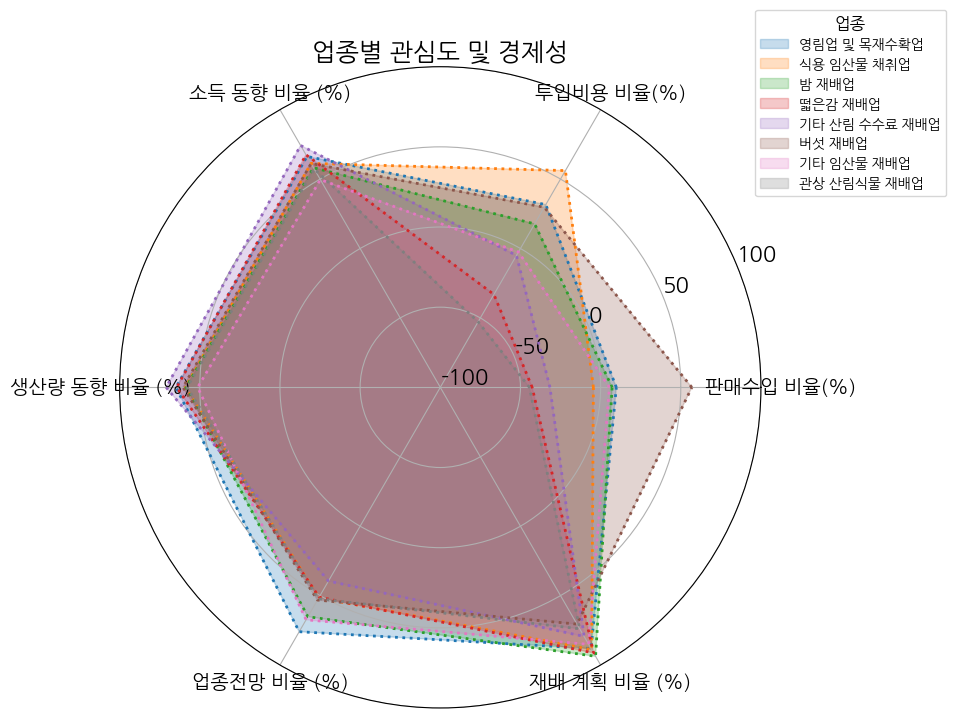

In [ ]:
# 필요한 데이터 추출: 분석 대상 업종만 선택
categories_to_analyze = [
    "영림업 및 목재수확업", "식용 임산물 채취업", "밤 재배업",
    "떫은감 재배업", "기타 산림 수수료 재배업", "버섯 재배업",
    "기타 임산물 재배업", "관상 산림식물 재배업"
]
selected_df = df[df['Category'].isin(categories_to_analyze)]

# 관심도 분석 지표
categories = ['판매수입 비율(%)', '투입비용 비율(%)', '소득 동향 비율 (%)', '생산량 동향 비율 (%)',
              '업종전망 비율 (%)', '재배 계획 비율 (%)']

# 각 업종의 데이터를 준비
radar_data = {}
for idx, row in selected_df.iterrows():
    radar_data[row['Category']] = [row[category] for category in categories]

# 각 지표에 해당하는 각도 계산
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # 시작과 끝을 연결

# 레이더 차트 생성
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# 업종별 데이터 추가
for idx, (key, values) in enumerate(radar_data.items()):
    values += values[:1]  # 닫힌 형태로 만듦
    ax.fill(angles, values, color=colors[idx], alpha=0.25, label=key)
    ax.plot(angles, values, linestyle='dotted', color=colors[idx], linewidth=2)

# 차트 설정
ax.set_ylim(-100, 100)  # 최대값 100으로 설정
ax.set_yticks(range(-100, 101, 50))  # 50 단위로 눈금 설정
ax.set_yticklabels(['-100', '-50', '0', '50', '100'], fontsize=16, fontweight='bold')


# X축 레이블
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=14, fontweight='bold')

# 제목 및 범례
ax.set_title('업종별 관심도 및 경제성', fontsize=18, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, title_fontsize=12, title='업종')  # 범례 글씨
plt.tight_layout()
plt.show()

#산림 빅데이터 거래소 - 2019년~2020년 성/연령/지역 등 이용자 분류별 6대임산물 관심도 정보
 https://www.bigdata-forest.kr/product/NMO005601
```



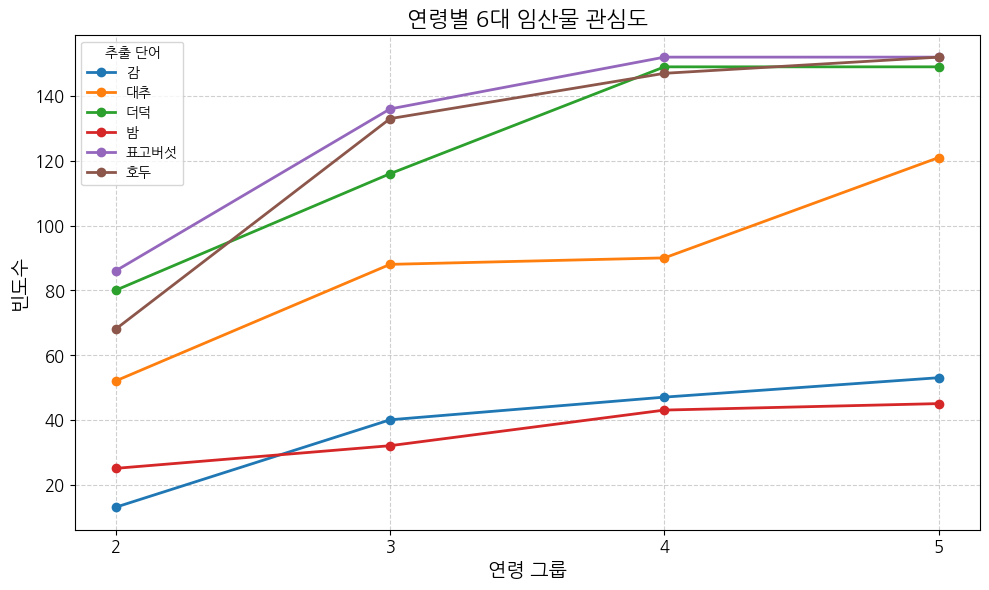

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/data/6.csv',
    encoding='cp949',
    encoding_errors='ignore',
    delimiter=',',
    on_bad_lines='skip'
)

# age_group_cd와 extrc_word_nm별 빈도 계산
grouped_data = data.groupby(['age_group_cd', 'extrc_word_nm']).size().reset_index(name='frequency')

# x축 값 필터링
filtered_data = grouped_data[grouped_data['age_group_cd'].isin([2, 3, 4, 5])]

# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 extrc_word_nm에 대해 선 그래프 그리기
for word in filtered_data['extrc_word_nm'].unique():
    word_data = filtered_data[filtered_data['extrc_word_nm'] == word]
    plt.plot(word_data['age_group_cd'], word_data['frequency'], marker='o', label=word, linewidth=2)  # 선 굵기 2로 설정

# 그래프 스타일 설정
plt.title('연령별 6대 임산물 관심도', fontsize=16, fontweight='bold')
plt.xlabel('연령 그룹', fontsize=14, fontweight='bold')
plt.ylabel('빈도수', fontsize=14, fontweight='bold')
plt.xticks([2, 3, 4, 5], fontsize=12, fontweight='bold')  # x축 글씨 굵게
plt.yticks(fontsize=12, fontweight='bold')                # y축 글씨 굵게
plt.legend(title='추출 단어', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 출력
plt.tight_layout()
plt.show()

#산림 빅데이터 거래소 - 임산물 관심인구 정보
https://www.bigdata-forest.kr/product/FPL090101

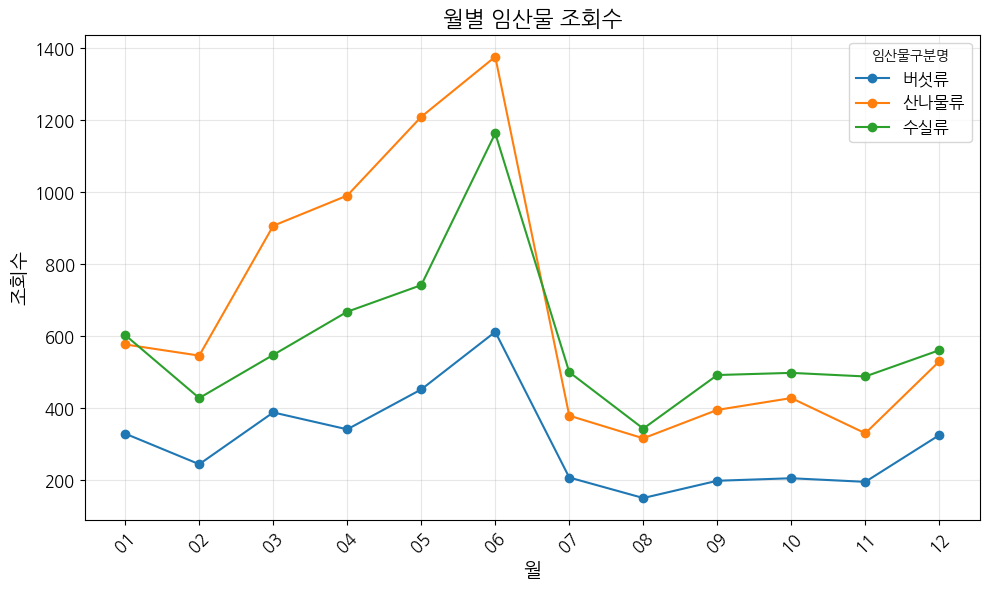

In [ ]:
# 데이터 로드
data2 = pd.read_csv(
    r'/content/drive/MyDrive/data/2.csv',
    encoding='cp949',
    on_bad_lines='skip',
    delimiter='|',
    names=['테이블순번', '관심인구ID', '추출단어명', '임산물구분명', '정보획득일자', '이용자성별코드', '연령그룹코드', '이용자직업명',
           '가구소득그룹명', '결혼여부명', '자녀여부명', '주거형태명', '이용자지역시도명', '이용자지역구명', '이용자지역동명',
           '자동차그룹명', '휴대전화제조사명', '휴대전화가입회사명', '정보획득사이트URL', '정보획득사이트제목명', '1', '2', '3', '4']
)
data2 = data2.iloc[:, :-4]  # 필요 없는 열 삭제

# 정보획득일자에서 월 추출
data2['정보획득월'] = data2['정보획득일자'].astype(str).str[4:6]

# 임산물구분명과 월별로 데이터 집계
monthly_counts = data2.groupby(['정보획득월', '임산물구분명']).size().unstack(fill_value=0)

# 선 그래프 생성
plt.figure(figsize=(10, 6))
for column in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[column], marker='o', label=column)

# 그래프 스타일 설정
plt.title('월별 임산물 조회수', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=14, fontweight='bold')
plt.ylabel('조회수', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='임산물구분명', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 출력
plt.show()